<a href="https://colab.research.google.com/github/rywards/belarusian_regression/blob/main/Belarusian_Car_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import io
import tensorflow as tf
from tensorflow.keras import layers

# Make numpy values easier to read, print verison
np.set_printoptions(precision=3, suppress=True)
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.7.0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars.csv


In [ ]:
# storing dataset in a Pandas Dataframe
belarusian_cars = pd.read_csv(io.BytesIO(uploaded['cars.csv']))
df = pd.get_dummies(belarusian_cars)
# can't use trad increment operator; user += or -=
# checking to see if data actually got entered ('hard way')
i = 0;
print("My function*****")
for index, row in belarusian_cars.iterrows():
  print("Row number", i+1, ":",row["manufacturer_name"], row["model_name"], row["odometer_value"],"km")
  i+=1
  if i>=10:
    break

# set n='whatever amount of rows to print'
print("\nPandas Frame Output")
belarusian_cars.head(n=10)

My function*****
Row number 1 : Subaru Outback 190000 km
Row number 2 : Subaru Outback 290000 km
Row number 3 : Subaru Forester 402000 km
Row number 4 : Subaru Impreza 10000 km
Row number 5 : Subaru Legacy 280000 km
Row number 6 : Subaru Outback 132449 km
Row number 7 : Subaru Forester 318280 km
Row number 8 : Subaru Legacy 350000 km
Row number 9 : Subaru Outback 179000 km
Row number 10 : Subaru Forester 571317 km

Pandas Frame Output


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7
5,Subaru,Outback,automatic,silver,132449,2011,gasoline,False,gasoline,2.5,universal,False,owned,all,14700.00,True,Минская обл.,20,56,False,True,False,False,False,True,False,True,True,True,67
6,Subaru,Forester,automatic,black,318280,1998,gasoline,False,gasoline,2.5,universal,False,owned,all,3000.00,True,Минская обл.,8,147,False,True,False,False,True,True,False,False,True,True,307
7,Subaru,Legacy,automatic,silver,350000,2004,gasoline,False,gasoline,2.5,sedan,False,owned,all,4500.00,False,Брестская обл.,7,29,False,True,True,False,False,False,False,False,False,True,73
8,Subaru,Outback,automatic,grey,179000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,12900.00,False,Минская обл.,17,33,False,True,True,True,True,True,True,True,True,True,87
9,Subaru,Forester,automatic,silver,571317,1999,gasoline,False,gasoline,2.5,universal,False,owned,all,4200.00,True,Минская обл.,8,11,False,True,True,False,False,True,False,False,False,True,43


In [ ]:
# turned categorical values into 0,1
# 1 if true
cat_convert_belarusian_cars = pd.get_dummies(belarusian_cars)
df.head()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,manufacturer_name_Acura,manufacturer_name_Alfa Romeo,manufacturer_name_Audi,manufacturer_name_BMW,manufacturer_name_Buick,manufacturer_name_Cadillac,manufacturer_name_Chery,manufacturer_name_Chevrolet,manufacturer_name_Chrysler,manufacturer_name_Citroen,manufacturer_name_Dacia,manufacturer_name_Daewoo,manufacturer_name_Dodge,manufacturer_name_Fiat,manufacturer_name_Ford,manufacturer_name_Geely,manufacturer_name_Great Wall,manufacturer_name_Honda,manufacturer_name_Hyundai,manufacturer_name_Infiniti,...,color_orange,color_other,color_red,color_silver,color_violet,color_white,color_yellow,engine_fuel_diesel,engine_fuel_electric,engine_fuel_gas,engine_fuel_gasoline,engine_fuel_hybrid-diesel,engine_fuel_hybrid-petrol,engine_type_diesel,engine_type_electric,engine_type_gasoline,body_type_cabriolet,body_type_coupe,body_type_hatchback,body_type_liftback,body_type_limousine,body_type_minibus,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_emergency,state_new,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear,location_region_Брестская обл.,location_region_Витебская обл.,location_region_Гомельская обл.,location_region_Гродненская обл.,location_region_Минская обл.,location_region_Могилевская обл.
0,190000,2010,False,2.5,False,10900.00,False,9,13,False,True,True,True,False,True,False,True,True,True,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
1,290000,2002,False,3.0,False,5000.00,True,12,54,False,True,False,False,True,True,False,False,False,True,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
2,402000,2001,False,2.5,False,2800.00,True,4,72,False,True,False,False,False,False,False,False,True,True,151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,10000,1999,False,3.0,False,9999.00,True,9,42,True,False,False,False,False,False,False,False,False,False,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
4,280000,2001,False,2.5,False,2134.11,True,14,7,False,True,False,True,True,False,False,False,False,True,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0


In [ ]:
# working with the categorical values
# first using .info()
# this prints info about the columns
print(belarusian_cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


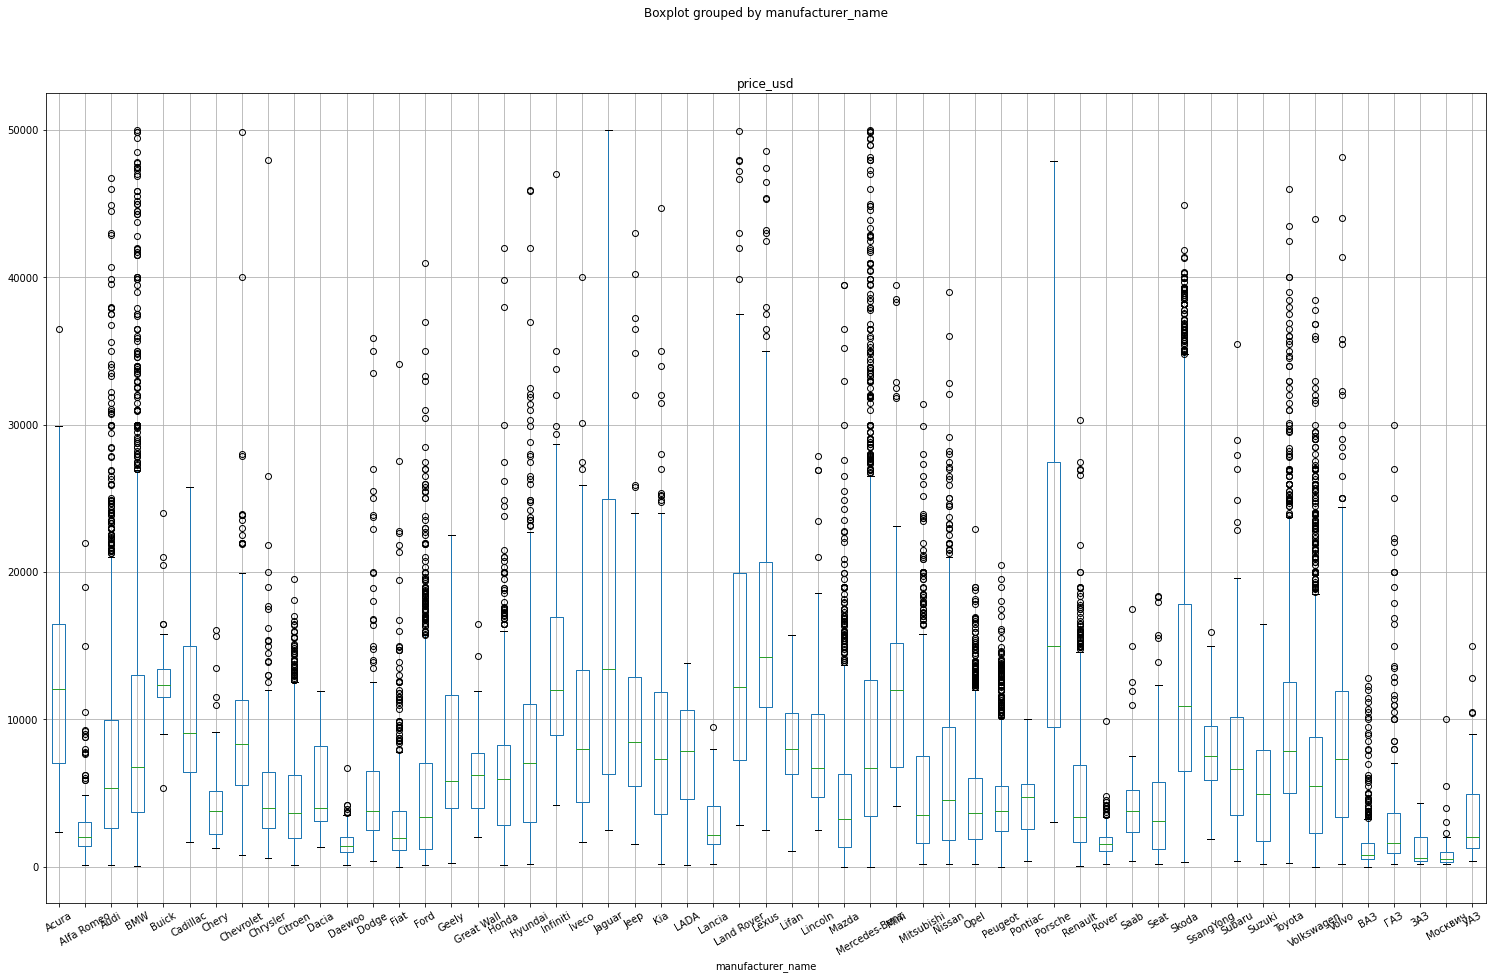

In [ ]:
# determining relationship between our categorical and numerical attributes
# we use a boxplot in this example
# Note: numerical value needs to be first or you will get an error
belarusian_cars.boxplot('price_usd','manufacturer_name',rot = 30,figsize=(25,15))

In [ ]:
# now we will take all the categorical values out in a separate set
# we will check if it worked after copying (in this case it should; no numericals exist here)
cat_belarusian_cars = belarusian_cars.select_dtypes(include=['object','bool']).copy()
cat_belarusian_cars.head()

,manufacturer_name,model_name,transmission,color,engine_fuel,engine_has_gas,engine_type,body_type,has_warranty,state,drivetrain,is_exchangeable,location_region,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,Subaru,Outback,automatic,silver,gasoline,False,gasoline,universal,False,owned,all,False,Минская обл.,False,True,True,True,False,True,False,True,True,True
1,Subaru,Outback,automatic,blue,gasoline,False,gasoline,universal,False,owned,all,True,Минская обл.,False,True,False,False,True,True,False,False,False,True
2,Subaru,Forester,automatic,red,gasoline,False,gasoline,suv,False,owned,all,True,Минская обл.,False,True,False,False,False,False,False,False,True,True
3,Subaru,Impreza,mechanical,blue,gasoline,False,gasoline,sedan,False,owned,all,True,Минская обл.,True,False,False,False,False,False,False,False,False,False
4,Subaru,Legacy,automatic,black,gasoline,False,gasoline,universal,False,owned,all,True,Гомельская обл.,False,True,False,True,True,False,False,False,False,True


In [ ]:
# null checks
num_nulls = cat_belarusian_cars.isnull().values.sum()
if num_nulls == 0:
  print("No nulls!")

else:
  print("Number of nulls:", num_nulls)


No nulls!


In [ ]:
# printing counts of manufacturers
man_counts = cat_belarusian_cars['manufacturer_name'].value_counts()
print(man_counts)

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

In [ ]:
# similar to head, prints the bottom amount of rows
# default 5
belarusian_cars.tail()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
5,Subaru,Outback,automatic,silver,132449,2011,gasoline,False,gasoline,2.5,universal,False,owned,all,14700.0,True,Минская обл.,20,56,False,True,False,False,False,True,False,True,True,True,67
6,Subaru,Forester,automatic,black,318280,1998,gasoline,False,gasoline,2.5,universal,False,owned,all,3000.0,True,Минская обл.,8,147,False,True,False,False,True,True,False,False,True,True,307
7,Subaru,Legacy,automatic,silver,350000,2004,gasoline,False,gasoline,2.5,sedan,False,owned,all,4500.0,False,Брестская обл.,7,29,False,True,True,False,False,False,False,False,False,True,73
8,Subaru,Outback,automatic,grey,179000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,12900.0,False,Минская обл.,17,33,False,True,True,True,True,True,True,True,True,True,87
9,Subaru,Forester,automatic,silver,571317,1999,gasoline,False,gasoline,2.5,universal,False,owned,all,4200.0,True,Минская обл.,8,11,False,True,True,False,False,True,False,False,False,True,43


In [ ]:
# oblast prediction
belarusian_oblast = belarusian_cars.copy()
belarusian_labels = belarusian_oblast.pop("location_region")

In [ ]:
# turning oblast copy into numpy array
belarusian_oblast = np.array(belarusian_oblast)
belarusian_oblast

array([['Subaru', 'Outback', 'automatic', 'silver', 190000, 2010,
        'gasoline', False, 'gasoline', 2.5, 'universal', False, 'owned',
        'all', 10900.0, False, 9, 13, False, True, True, True, False,
        True, False, True, True, True, 16],
       ['Subaru', 'Outback', 'automatic', 'blue', 290000, 2002,
        'gasoline', False, 'gasoline', 3.0, 'universal', False, 'owned',
        'all', 5000.0, True, 12, 54, False, True, False, False, True,
        True, False, False, False, True, 83],
       ['Subaru', 'Forester', 'automatic', 'red', 402000, 2001,
        'gasoline', False, 'gasoline', 2.5, 'suv', False, 'owned', 'all',
        2800.0, True, 4, 72, False, True, False, False, False, False,
        False, False, True, True, 151],
       ['Subaru', 'Impreza', 'mechanical', 'blue', 10000, 1999,
        'gasoline', False, 'gasoline', 3.0, 'sedan', False, 'owned',
        'all', 9999.0, True, 9, 42, True, False, False, False, False,
        False, False, False, False, False, 

In [ ]:
# creating regression model to predict oblast of vehicle
belarusian_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

belarusian_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())

belarusian_model

In [ ]:
# normalizing the columns
normalize = layers.Normalization()
normalize.adapt(belarusian_oblast)

SyntaxError: ignored

# Error notes

Need to preprocess the data to one type to remove the errors
Do this before doing the model.fit.

Follow this [link](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/load_data/csv.ipynb#scrollTo=GapLOj1OOTQH) for preprocessing data.

In [ ]:
# training the model
belarusian_model.fit(belarusian_oblast, belarusian_labels, epochs=10)

ValueError: ignored